In [42]:
%pip install Flask
%pip install -U scikit-learn  # assuming you're using a scikit-learn model


  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached werkzeug-3.0.3-py3-none-any.whl (227 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [1]:
%pip install seaborn  matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load / required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Introduction
Fake news has become a significant concern in today’s digital age. As misinformation spreads rapidly, it’s crucial to develop robust models that can distinguish between genuine and fabricated news articles. In this project, we explore a machine learning-based approach to detect fake news using natural language processing (NLP) techniques.

# **Model Selection**
We experimented with two classifiers: Linear Support Vector Classifier (LinearSVC) and Multinomial Naive Bayes (MultinomialNB).
Both models are well-suited for text classification tasks.

In [3]:
df = pd.read_csv('./dataset/indian-news-dataset-updated.csv')
# df = pd.read_csv('./dataset/fake_and_real_news.csv')




# **Basic Data Exploration**

In [4]:
    # Display first 20 rows of the dataframe
df.head(20)

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...
5,REAL,ROME: Novak Djokovic knows it isn't model beha...
6,FAKE,A viral image showing controversial Islamic pr...
7,FAKE,Several photos are being shared with the misle...
8,FAKE,The driver of the DMU train Arvind Kumar has N...
9,FAKE,An old video of a Dassault Rafale aircraft's s...


In [5]:
df['label'].value_counts()   

label
FAKE    1877
REAL    1852
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

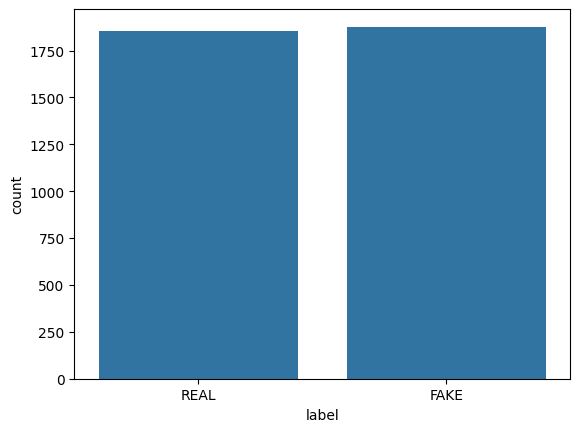

In [7]:
# Checking for null values
df.isnull().sum()

label    0
text     8
dtype: int64

In [8]:
#Checking for Blank Strings
df['text'].str.isspace().sum()

0

# **EDA on Bag of Words**

In [9]:
# countvectorizer (is a class from sklearn module) is used to convert text data into matrix
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer(stop_words='english')

In [11]:
# matrix = cv.fit_transform(df[df['label'] == 'Fake']['text'])
df['text'] = df['text'].astype(str)

# Filter for 'Fake' labeled texts and ensure non-empty text
fake_texts = df[df['label'] == 'FAKE']['text'].dropna()
fake_texts = fake_texts[fake_texts.str.strip() != '']

# Fit and transform the data
if not fake_texts.empty:
    matrix = cv.fit_transform(fake_texts)

In [12]:
# Get the feature names
feature_names = cv.get_feature_names_out()

In [13]:
# Calculate the word frequencies
word_frequencies = matrix.sum(axis=0).tolist()[0]

In [14]:
# Combine feature names and word frequencies
freqs = zip(feature_names, word_frequencies)

In [15]:
# Sort from largest to smallest and get the top 20 words
top_20_words = sorted(freqs, key=lambda x: -x[1])[:20]

In [16]:

# Create a DataFrame for the top 20 words
df_top_20 = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])


C:\Users\smrut\AppData\Local\Temp\ipykernel_28296\2572102952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_top_20, palette='viridis')


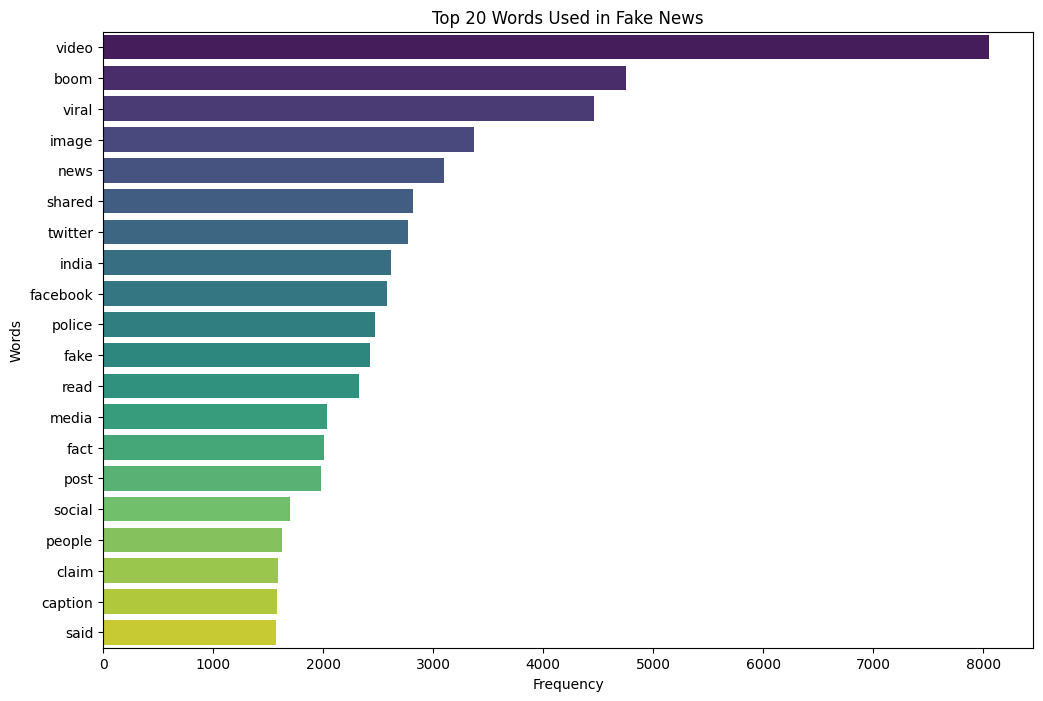

In [17]:
# Assuming df_top_20 is already defined
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=df_top_20, palette='viridis')

# Add title and labels
plt.title('Top 20 Words Used in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Show the plot
plt.show()

C:\Users\smrut\AppData\Local\Temp\ipykernel_28296\1366960463.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_top_20_real, palette='viridis')


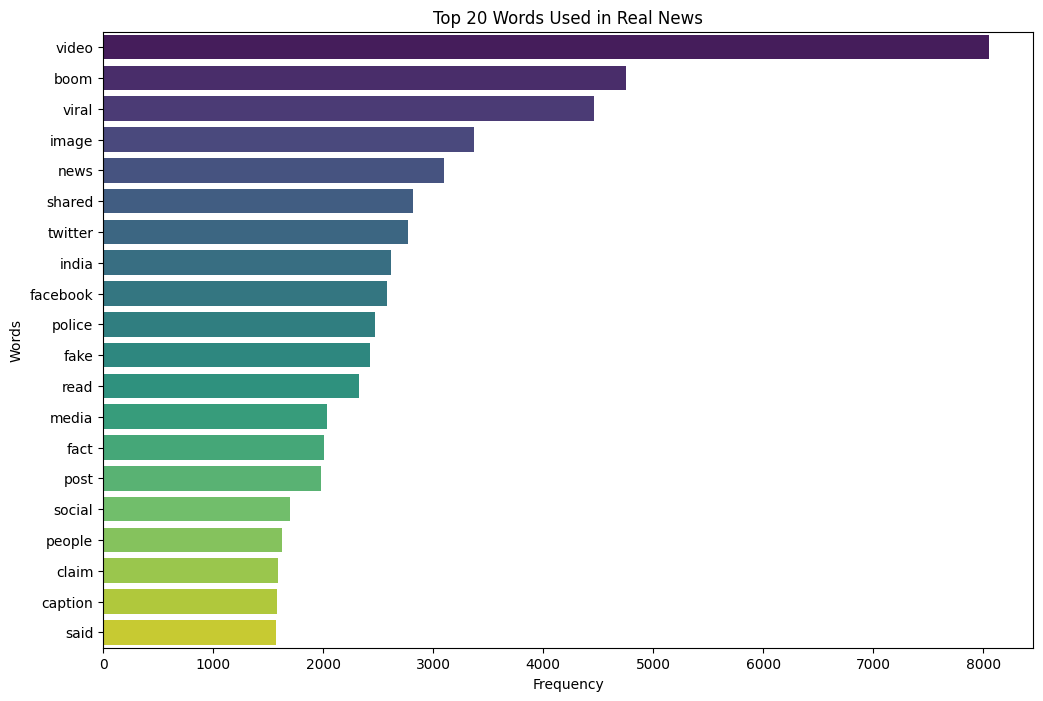

In [18]:

# Sum the frequencies of each word
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])

# Sort the words by frequency, from largest to smallest
sorted_freqs = sorted(freqs, key=lambda x: -x[1])[:20]

# Convert to DataFrame
df_top_20_real = pd.DataFrame(sorted_freqs, columns=['Word', 'Frequency'])

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=df_top_20_real, palette='viridis')

# Add title and labels
plt.title('Top 20 Words Used in Real News')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Show the plot
plt.show()

# **Machine Learning**

**Training and Data**

In [19]:
# train_test_split splits dataset into trainning and testing
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']
# test_size=0.2 i.e 20% of data is reserved for trainning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**LinearSVC**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [21]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC())])

In [22]:
# Feed the training data through the pipeline
pipe.fit(X_train, y_train)  

C:\Users\smrut\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
preds = pipe.predict(X_test)

In [25]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00       380
        REAL       1.00      1.00      1.00       366

    accuracy                           1.00       746
   macro avg       1.00      1.00      1.00       746
weighted avg       1.00      1.00      1.00       746



In [26]:
cm = confusion_matrix(y_test,preds)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

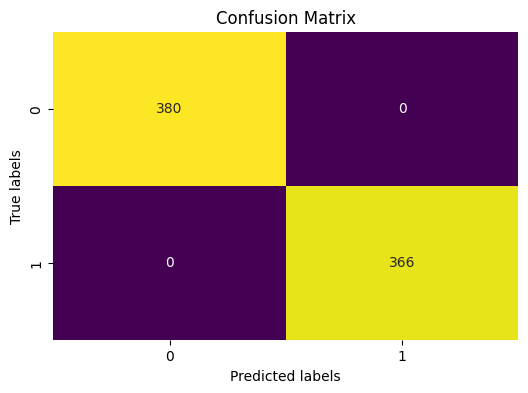

In [28]:
# Create a heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**MultiniomialNB**

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [30]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('nb', MultinomialNB())])

In [31]:
# Feed the training data through the pipeline
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [32]:
preds = pipe.predict(X_test)

In [33]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        FAKE       0.95      1.00      0.97       380
        REAL       1.00      0.94      0.97       366

    accuracy                           0.97       746
   macro avg       0.97      0.97      0.97       746
weighted avg       0.97      0.97      0.97       746



In [34]:
cm = confusion_matrix(y_test,preds)

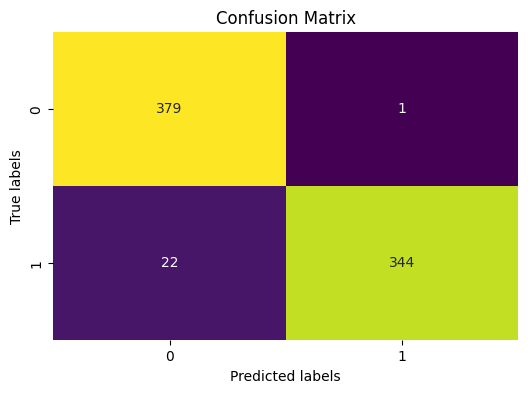

In [35]:
# Create a heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# import pickle
# Save the trained model to a file
# filename = 'nlp_fnd_model.pkl'
# with open('nlp_fnd_model.pkl', 'wb') as model_file:
    # pickle.dump(pipe, model_file)
import pickle

with open('nlp_fnd_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# **Results**
Our models achieved remarkable performance:

LinearSVC:
* Precision: 1.00
* Recall: 1.00
* F1-score: 1.00
* Accuracy: 1.00

MultinomialNB:
* Precision: 0.96
* Recall: 0.97
* F1-score: 0.96
* Accuracy: 0.96
 


# **Conclusion**

Our machine learning-based approach successfully detected fake news articles with high accuracy. The combination of TF-IDF features and well-chosen classifiers proved effective. As misinformation continues to proliferate, robust fake news detection systems are essential for maintaining a reliable information ecosystem.

Test Cases 